<a href="https://colab.research.google.com/github/okcy58/AI2022/blob/main/%EC%96%B8%EC%96%B4%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 언어 모델(Language Model)
- 단어 시퀀스(문장)에 확률을 할당하는 모델
- 통계를 이용한 방법과 인공 신경망을 이용한 방법
- 이전 단어들이 주어졌을 때 다음 단어를 예측

- 언어 모델링(Language Modeling): 주어진 단어들로부터 아직 모르는 단어를 예측하는 작업

https://www.cs.bgu.ac.il/~elhadad/nlp18/nlp02.html

http://www.marekrei.com/pub/Machine_Learning_for_Language_Modelling_-_lecture3.pdf





## 통계적 언어 모델(Statistical Language Model, SLM)
- 조건부 확률
- 카운트 기반의 접근
- 카운트 기반 접근의 한계 - 희소 문제(Sparsity Problem)
- N-gram 언어 모델(N-gram Language Model)
    - 희소 문제(Sparsity Problem)
    - n을 선택하는 것은 trade-off 문제.
- 참고자료
    - 조경현 교수 : https://www.edwith.org/deepnlp/lecture/29214/
    - 스탠포드 대학교 강의 자료 : https://web.stanford.edu/~jurafsky/slp3/3.pdf
    - 뉴욕대학교 강의 자료 : https://cs.nyu.edu/courses/spring17/CSCI-UA.0480-009/lecture3-and-half-n-grams.pdf

## 한국어에서의 언어 모델(Language Model for Korean Sentences)
- 한국어는 어순이 중요하지 않다.
- 한국어는 교착어이다. => 토큰화를 통해 접사나 조사 등을 분리
- 한국어는 띄어쓰기가 제대로 지켜지지 않는다.

## 언어 모델의 평가 방법(Evaluation metric)
- 펄플렉서티(Perplexity, PPL): 
![PPL수식](PPL.PNG)
- PPL은 선택할 수 있는 가능한 경우의 수를 의미하는 분기계수(branching factor)
![모델별PPL_비교](모델별PPL_비교.PNG)
- 링크 : https://research.fb.com/building-an-efficient-neural-language-model-over-a-billion-words/

추천하는 참고 링크 :
- https://towardsdatascience.com/perplexity-intuition-and-derivation-105dd481c8f3
- https://www.slideshare.net/shkulathilake/nlpkashkevaluating-language-model
- http://www.statmt.org/book/slides/07-language-models.pdf
- https://github.com/kobikun/wiki/wiki/Language-Models
- https://courses.engr.illinois.edu/cs447/fa2018/Slides/Lecture03.pdf

# 카운트 기반의 단어 표현(Count based word Representation)
- DTM(Document Term Matrix)
- TF-IDF(Term Frequency-Inverse Document Frequency)

## 다양한 단어의 표현 방법
- 국소 표현(Local Representation) 방법: 
    - 해당 단어 그 자체만 보고, 특정값을 맵핑하여 단어를 표현
    - 이산표현(Discrete Representation)
- 분산 표현(Distributed Representation) 방법: 
    - 주변을 참고하여 단어를 표현
    - 연속 표현(Continuous Represnetation)
    


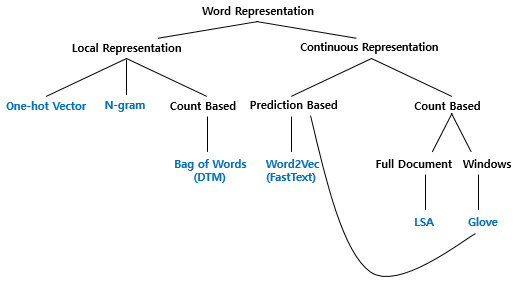

## Bag of Words(BoW)
- 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법
- 분류 문제나 여러 문서 간의 유사도를 구하는 문제에 주로 사용
- BoW를 만드는 과정
    - (1) 각 단어에 고유한 정수 인덱스를 부여합니다.  # 단어 집합 생성.
    - (2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만듭니다.  

In [ ]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
  # 온점 제거 및 형태소 분석
  document = document.replace('.', '')
  tokenized_document = okt.morphs(document)

  word_to_index = {}
  bow = []

  for word in tokenized_document:  
    if word not in word_to_index.keys():
      word_to_index[word] = len(word_to_index)  
      # BoW에 전부 기본값 1을 넣는다.
      bow.insert(len(word_to_index) - 1, 1)
    else:
      # 재등장하는 단어의 인덱스
      index = word_to_index.get(word)
      # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더한다.
      bow[index] = bow[index] + 1

  return word_to_index, bow

In [ ]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [ ]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_words(doc2)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [ ]:
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


### CountVectorizer 클래스로 BoW 만들기
- 길이가 2이상인 문자에 대해서만 토큰으로 인식

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


In [ ]:
vector

CountVectorizer(token_pattern='(?u)\x08\\w+\x08')

In [ ]:
tokenized_document = okt.morphs(doc3)
str_morphs = ' '.join(tokenized_document)
str_morphs

['정부 가 발표 하는 물가상승률 과 소비자 가 느끼는 물가상승률 은 다르다 . 소비자 는 주로 소비 하는 상품 을 기준 으로 물가상승률 을 느낀다 .']

In [ ]:
print('bag of words vector :', vector.fit_transform([str_morphs]).toarray())
print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 1 1 3 1 1 1 2 1 1 1 2]]
vocabulary : {'정부': 10, '발표': 5, '하는': 12, '물가상승률': 4, '소비자': 8, '느끼는': 1, '다르다': 3, '주로': 11, '소비': 7, '상품': 6, '기준': 0, '으로': 9, '느낀다': 2}


In [ ]:
vector.vocabulary_

{'정부': 10,
 '발표': 5,
 '하는': 12,
 '물가상승률': 4,
 '소비자': 8,
 '느끼는': 1,
 '다르다': 3,
 '주로': 11,
 '소비': 7,
 '상품': 6,
 '기준': 0,
 '으로': 9,
 '느낀다': 2}

In [ ]:
import re
text = "I was wondering if anyone out there could enlighten me on this car."

# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))

 was wondering anyone out there could enlighten this car.


## 문서 단어 행렬(Document-Term Matrix, DTM)
- 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현
- 한계
    - 희소 표현(Sparse representation)
    - 단순 빈도 수 기반 접근

## TF-IDF(Term Frequency-Inverse Document Frequency)
- DTM 내에 있는 각 단어에 대한 중요도를 계산
- 문서의 유사도, 검색 시스템에서 검색 결과의 중요도, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 사용
- tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수
- df(t) : 특정 단어 t가 등장한 문서의 수
- idf(d, t) : df(t)에 반비례하는 수
![IDF](IDF.PNG)
- 모든 문서에서 자주 등장하는 단어는 중요도가 낮고, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단

In [ ]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [ ]:
# 총 문서의 수
N = len(docs) 

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

def tfidf(t, d):
  return tf(t,d)* idf(t)

In [ ]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [ ]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [ ]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


### 사이킷런을 이용한 DTM과 TF-IDF 실습

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


# 벡터의 유사도(Vector Similarity)
## 코사인 유사도(Cosine Similarity)
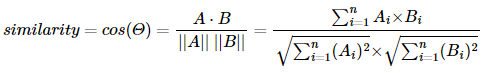

- 

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cos_sim(doc2, doc3))

문서 1과 문서2의 유사도 : 0.6666666666666667
문서 1과 문서3의 유사도 : 0.6666666666666667
문서 2와 문서3의 유사도 : 1.0000000000000002


- 유클리드 거리로 유사도를 연산하면 문서 1과 문서3 > 문서 2와 문서 3

In [ ]:
def euclidean_distance(A, B):   
    return np.sqrt(np.sum((A-B)**2))

In [ ]:
print(f"1. 문서1-문서2 간 유사도: {euclidean_distance(doc1, doc2)}")
print(f"2. 문서1-문서3 간 유사도: {euclidean_distance(doc1, doc3)}")
print(f"3. 문서2-문서3 간 유사도: {euclidean_distance(doc2, doc3)}")

1. 문서1-문서2 간 유사도: 1.4142135623730951
2. 문서1-문서3 간 유사도: 2.6457513110645907
3. 문서2-문서3 간 유사도: 1.7320508075688772


## 유사도를 이용한 추천 시스템 구현하기
- 다운로드 링크 : https://www.kaggle.com/rounakbanik/the-movies-dataset

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('movies_metadata.csv', low_memory=False)
data.head(2)

,Unnamed: 0,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,...,tagline,movie_title,vote_average,num_voted_users,title_year,country,director_name,actor_1_name,actor_2_name,actor_3_name
0,0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,Enter the World of Pandora.,Avatar,7.2,11800,2009.0,United States of America,James Cameron,Zoe Saldana,Sigourney Weaver,Stephen Lang
1,1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0,United States of America,Gore Verbinski,Orlando Bloom,Keira Knightley,Stellan Skarsgård


In [ ]:
# 상위 2만개의 샘플을 data에 저장
data = data.head(20000)

In [ ]:
# overview 열에 존재하는 모든 결측값을 전부 카운트하여 출력
print('overview 열의 결측값의 수:',data['overview'].isnull().sum())

overview 열의 결측값의 수: 3


In [ ]:
# 결측값을 빈 값으로 대체
data['overview'] = data['overview'].fillna('')

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print('TF-IDF 행렬의 크기(shape) :',tfidf_matrix.shape)

TF-IDF 행렬의 크기(shape) : (4803, 20978)


In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('코사인 유사도 연산 결과 :',cosine_sim.shape)

코사인 유사도 연산 결과 : (4803, 4803)


In [ ]:
title_to_index = dict(zip(data['movie_title'], data.index))

# 영화 제목 Father of the Bride Part II의 인덱스를 리턴
idx = title_to_index["Pirates of the Caribbean: At World's End"]
print(idx)

1


In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당 영화의 인덱스를 받아온다.
    idx = title_to_index[title]

    # 해당 영화와 모든 영화와의 유사도를 가져온다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아온다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 얻는다.
    movie_indices = [idx[0] for idx in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴한다.
    return data['movie_title'].iloc[movie_indices]

In [ ]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: movie_title, dtype: object

## 유클리드 거리(Euclidean distance)
![유클리드거리](유클리드거리.PNG)
![2차원_유클리드거리](2차원_유클리드거리.PNG)

In [ ]:
import numpy as np

def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))
docQ = np.array((1,1,0,1))

print('문서1과 문서Q의 거리 :',dist(doc1,docQ))
print('문서2과 문서Q의 거리 :',dist(doc2,docQ))
print('문서3과 문서Q의 거리 :',dist(doc3,docQ))

문서1과 문서Q의 거리 : 2.23606797749979
문서2과 문서Q의 거리 : 3.1622776601683795
문서3과 문서Q의 거리 : 2.449489742783178


## 자카드 유사도(Jaccard similarity)
![자카드유사도](자카드유사도.PNG)

In [ ]:
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

# 토큰화
tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

print('문서1 :',tokenized_doc1)
print('문서2 :',tokenized_doc2)

문서1 : ['apple', 'banana', 'everyone', 'like', 'likey', 'watch', 'card', 'holder']
문서2 : ['apple', 'banana', 'coupon', 'passport', 'love', 'you']


In [ ]:
union = set(tokenized_doc1).union(set(tokenized_doc2))
print('문서1과 문서2의 합집합 :',union)

문서1과 문서2의 합집합 : {'love', 'banana', 'passport', 'card', 'apple', 'like', 'everyone', 'likey', 'you', 'holder', 'watch', 'coupon'}


In [ ]:
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print('문서1과 문서2의 교집합 :',intersection)

문서1과 문서2의 교집합 : {'apple', 'banana'}


In [ ]:
print('자카드 유사도 :',len(intersection)/len(union))

자카드 유사도 : 0.16666666666666666
